In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use("fivethirtyeight")

In [2]:
def gauss_jordan(a, b):
    n = len(b)
    
    # elimination phase
    #loops the row of the matrix
    for k in range(0, n - 1):
        #loops the values in the ith row (column values)
        for i in range(k+1, n):
            # Making the upper triangle, by altering some of the values in a for loop. the lower part will become 0.
            if a[i,k] != 0.0:
                lam  = a[i,k]/a[k,k]
                a[i,k+1:n] -= lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    # back substitution
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(a[k,k+1:n], b[k+1:n]))/a[k,k]
    return b

In [3]:
# don't use, arbitrary function
def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

     
def LUsolve(a,b):
    n = LUdecomp(a)
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
        b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

In [4]:
def take_values():
    dim = int(input("Enter the dimension of the matrix here: "))
    lhs = []
    rhs = []
    for i in range(dim):
        lhs.append([])
    nums = int(input('Enter the amount of elements per row: '))
    for k in range(dim):
        for j in range(nums):
            val = int(input('Input value(left-right, top-down): '))
            lhs[k].append(val)
    for l in range(dim):
        val = int(input('Input value(left-right, top-down): '))
        rhs.append(val)
    lhs_input = np.array(lhs,dtype= float)
    rhs_input = np.array(rhs,dtype = float)
    return lhs_input, rhs_input

In [14]:
def driver():
    lhs, rhs = take_values()
    print("Please choose the method that you want: ")
    print("1. Gauss-Jordan elimination \n2. LU decomposition")
    method_chosen = int(input("Enter here: "))
    
    # if gauss-jordan is chosen, process matrix with gauss-jordan
    if method_chosen == 1:
        result = gauss_jordan(lhs, rhs)
        print(f"The answer matrix is: {result}")
        return result
    elif method_chosen == 2:
        result_LU = LUsolve(lhs, rhs)
        print(f"The answer matrix is: {result_LU}")
        return result_LU;
    else:
        print("Invalid choice entered")
        return None

In [15]:
#program test case
driver()

Enter the dimension of the matrix here: 3
Enter the amount of elements per row: 3
Input value(left-right, top-down): 1
Input value(left-right, top-down): 2
Input value(left-right, top-down): -3
Input value(left-right, top-down): 2
Input value(left-right, top-down): -5
Input value(left-right, top-down): 4
Input value(left-right, top-down): 5
Input value(left-right, top-down): 4
Input value(left-right, top-down): -1
Input value(left-right, top-down): -3
Input value(left-right, top-down): 13
Input value(left-right, top-down): 5
Please choose the method that you want: 
1. Gauss-Jordan elimination 
2. LU decomposition
Enter here: 2
The answer matrix is: [ 1.54201102 -1.65426997  0.41115702]


array([ 1.54201102, -1.65426997,  0.41115702])

Enter the dimension of the matrix here: 2
Enter the amount of elements per row: 2
Input value(left-right, top-down): 3
Input value(left-right, top-down): -1
Input value(left-right, top-down): 2
Input value(left-right, top-down): 1
Input value(left-right, top-down): 7
Input value(left-right, top-down): 8
Enter the dimension of the matrix here: 2
Enter the amount of elements per row: 2
Input value(left-right, top-down): 3
Input value(left-right, top-down): -1
Input value(left-right, top-down): 2
Input value(left-right, top-down): 1
Input value(left-right, top-down): 7
Input value(left-right, top-down): 8


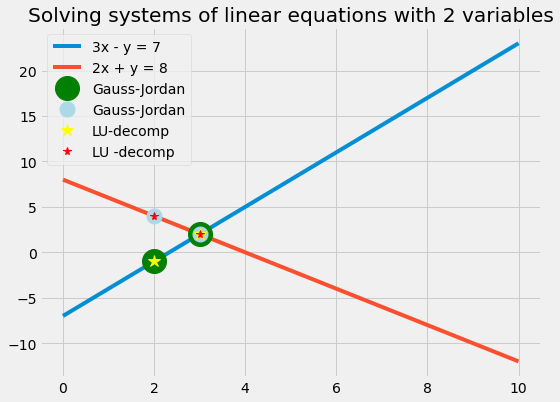

In [7]:
lhs, rhs = take_values()
result = gauss_jordan(lhs, rhs)
lhs, rhs = take_values()
LUresult = LUsolve(lhs, rhs)

# test case for 2 unknowns
x = np.linspace(0, 10, 100)
y = lambda x : 3*x - 7
y2 = lambda x: 8 - 2*x

fig = plt.figure(1, figsize = (8,6)); plt.clf(); ax = fig.add_subplot(111)
ax.plot(x, y(x), label = "3x - y = 7")
ax.plot(x, y2(x), label = "2x + y = 8")
ax.plot(result, y(result), 'o', markersize = 24, color = "green", label = "Gauss-Jordan")
ax.plot(result, y2(result), 'o', markersize = 15, color = "lightblue", label = "Gauss-Jordan")
ax.plot(LUresult, y(LUresult), "*r", markersize = 13, color = "yellow", label = "LU-decomp")
ax.plot(LUresult, y2(LUresult), "*r", markersize = 8, color = "red", label = "LU -decomp")
ax.set_title("Solving systems of linear equations with 2 variables")
ax.legend()

In [8]:
# lhsCube, rhsCube = take_values()
# print(gauss_jordan(lhsCube, rhsCube))
lhsCube, rhsCube = take_values()
resultCube = gauss_jordan(lhsCube, rhsCube)
print(resultCube)

Enter the dimension of the matrix here: 3
Enter the amount of elements per row: 3
Input value(left-right, top-down): 1
Input value(left-right, top-down): 2
Input value(left-right, top-down): -3
Input value(left-right, top-down): 2
Input value(left-right, top-down): -5
Input value(left-right, top-down): 4
Input value(left-right, top-down): 5
Input value(left-right, top-down): 4
Input value(left-right, top-down): -1
Input value(left-right, top-down): -3
Input value(left-right, top-down): 13
Input value(left-right, top-down): 5
[ 2. -1.  1.]


Text(0.5, 0.92, 'Systems of linear equations with 3 unknowns')

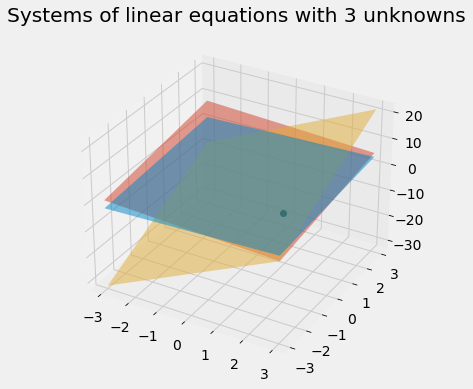

In [9]:
# test case for 3 unknowns
xCube = np.linspace(-3, 3, 50)
yCube = np.linspace(-3, 3,50)
X, Y = np.meshgrid(xCube, yCube)
zCube = (X + 2*Y + 3) / 3
zCube2 = (13 - 2*X + 5*Y) / 4
zCube3 = 5*X + 4*Y - 5
fig = plt.figure(2, figsize=(8,6)); plt.clf(); ax1 = fig.add_subplot(111, projection = "3d")
ax1.plot_surface(X,Y,zCube, alpha=0.5, rstride=100, cstride=100, label = "x + 2y -3z = -3")
ax1.plot_surface(X,Y,zCube2, alpha=0.5, rstride=100, cstride=100, label = "2x - 5y + 4z = 13")
ax1.plot_surface(X,Y,zCube3, alpha=0.5 , rstride = 100, cstride = 100, label = "5x + 4y - 1 = 5")
ax1.plot((2,),(-1,),(1,), lw=2, c='k', marker='o')
ax1.set_title("Systems of linear equations with 3 unknowns")